# Exercise 3

Create a model using K-Nearest Neighbors to perform classification using the personality dataset.

0 - 'introvert'

1 - 'extrovert'

# A. Import Libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn 
from sklearn import metrics
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# B. Load and Understand the Dataset

In [11]:
df = pd.read_excel('personality.xlsx')


In [12]:
df.head()

,Name,Post/Share Frequently?,Active in social media?,Replies to comments?,Number of friends/followers,Personality
0,Gabriel Joshua Dominisac,1,1,1,3393,1
1,Kesler Jason Cal,0,0,1,694,0
2,Randell Pabroquez,0,0,1,592,0
3,Aaron Manaloto,1,1,1,639,1
4,Michael Scott Ostique,1,1,1,1720,1


In [13]:
df.drop(columns='Name',inplace=True)
df.head()

,Post/Share Frequently?,Active in social media?,Replies to comments?,Number of friends/followers,Personality
0,1,1,1,3393,1
1,0,0,1,694,0
2,0,0,1,592,0
3,1,1,1,639,1
4,1,1,1,1720,1


1. Display the summary of all the features of the dataset using .info()

In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Post/Share Frequently?       50 non-null     int64
 1   Active in social media?      50 non-null     int64
 2   Replies to comments?         50 non-null     int64
 3   Number of friends/followers  50 non-null     int64
 4   Personality                  50 non-null     int64
dtypes: int64(5)
memory usage: 2.1 KB


2. Display the total number of samples from each Personality using .values_counts()

In [16]:
df['Personality'].value_counts()

Personality
0    27
1    23
Name: count, dtype: int64

# C. Split the dataset into training and test set

3. Convert the features into a numpy array using .values() and store it in a variable "X"

In [17]:
X = df.drop(columns=['Personality']).values


4. Convert the labels into a numpy array using .values() and store it in a variable "y"

In [18]:
y = df['Personality'].values

5. Use train_test_split() to split the data

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(40, 4)
(40,)
(10, 4)
(10,)


# D. Create the Model

6. Use KNN as a classifier by using KneighborsClassifier()


In [22]:
knn = KNeighborsClassifier(n_neighbors=13)

7. Train the model using the .fit()

In [23]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

8. Test the model using the .predict()

In [24]:
y_pred = knn.predict(X_test)

# Evaluate the model


9. Create a confusion matrix

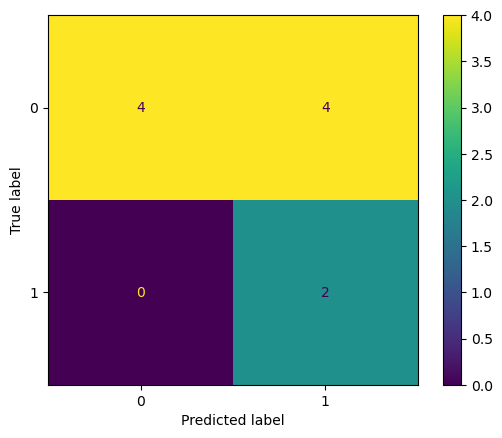

In [32]:
conf_matrix = confusion_matrix(y_pred, y_test, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=knn.classes_)
disp.plot()

10. Display the accuracy

In [34]:
metrics.accuracy_score(y_test, y_pred)

0.6

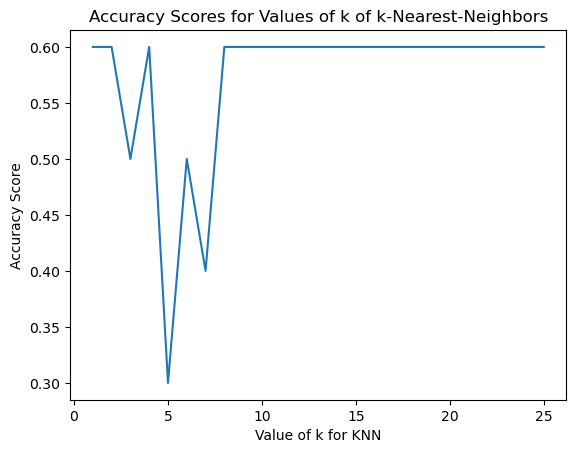

In [35]:
k_range = list(range(1,26))
scores = []

for k in k_range:
    
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(X_train, y_train)

    # Test the model
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [46]:
knn.predict([[0,1,0,1000]])

array([0], dtype=int64)

11. Display the precision

In [39]:
precision = precision_score(y_test, y_pred, average=None)
print("Precision:", precision)

Precision: [0.5 1. ]


12. Display the recall

In [40]:
recall = recall_score(y_test, y_pred, average=None)
print("Recall:", recall)


Recall: [1.         0.33333333]


13. Display the f1-score

In [41]:
f1 = f1_score(y_test, y_pred, average=None)
print("f1-score:", f1)

f1-score: [0.66666667 0.5       ]
